# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
org_df = pd.read_csv("covid19_Confirmed_dataset.csv")

In [49]:
org_df.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
#dropping unnecessary cols

df = org_df.drop(["Lat", "Long"], axis=1)

In [5]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Aggregating by the country name

In [6]:
df_agg = df.groupby("Country/Region").sum()

In [50]:
df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


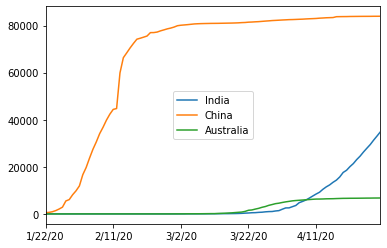

In [9]:
#plotting

df_agg.loc["India"].plot()
df_agg.loc["China"].plot()
df_agg.loc["Australia"].plot()
plt.legend()

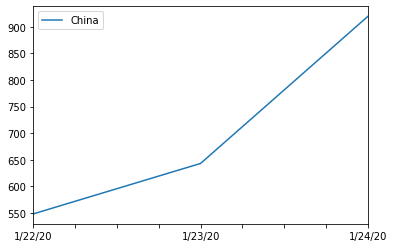

In [10]:
df_agg.loc["China"][:3].plot()
plt.legend()

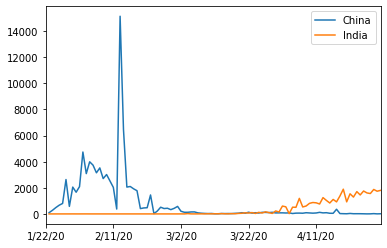

In [11]:
df_agg.loc['China'].diff().plot()
df_agg.loc['India'].diff().plot()
plt.legend()

In [12]:
#maximum infection rate in china in one day

df_agg.loc['China'].diff().max()

15136.0

In [13]:
#maximum infection rate in India in one day

df_agg.loc['India'].diff().max()

1893.0

In [14]:
#maximum infection rate in Australia in one day

df_agg.loc['Australia'].diff().max()

497.0

# Finding the max infection rate for all countries and putting in dataset

In [15]:


countries = list(df_agg.index)
max_rate = []
for i in countries:
    max_rate.append(df_agg.loc[i].diff().max())

In [16]:
df_agg["max_infect_rate"] = max_rate

In [17]:
df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [19]:
corona_data = pd.DataFrame(df_agg["max_infect_rate"])

In [21]:
corona_data.head()

,max_infect_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [35]:
corona_data.shape

(187, 1)

In [36]:
df_hrep = pd.read_csv("worldwide_happiness_report.csv")

In [52]:
df_hrep.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [38]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [39]:
df_hrep.drop(useless_cols,axis=1,inplace=True)
df_hrep.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [40]:
df_hrep.set_index("Country or region",inplace = True)
df_hrep.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [41]:
corona_data.shape

(187, 1)

In [42]:
df_hrep.shape

(156, 4)

# Performing Inner Join

In [43]:
data = corona_data.join(df_hrep,how="inner")
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


# Correlation Matrix

In [44]:
data.corr()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infect_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


# Visualizing The Results

__GDP vs max_infect_rate__

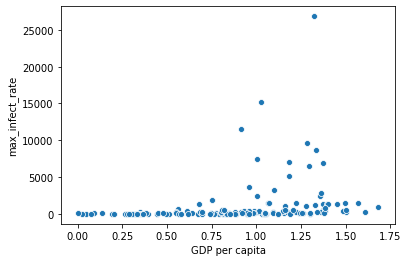

In [45]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x,y)

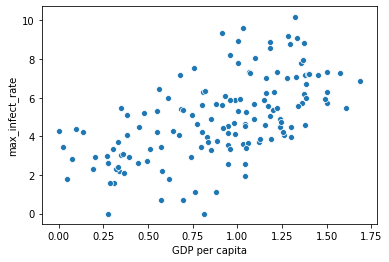

In [46]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x,np.log(y)) #apply log scaling to y

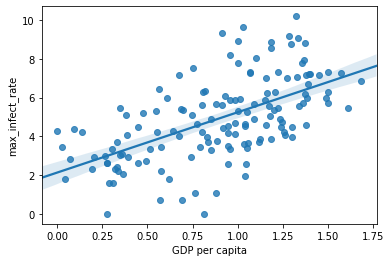

In [47]:
sns.regplot(x,np.log(y))

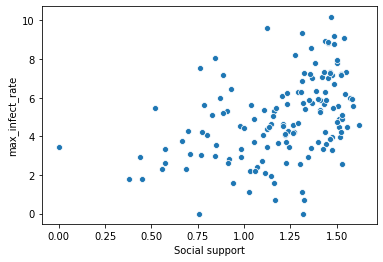

In [53]:
x = data["Social support"]
y = data["max_infect_rate"]
sns.scatterplot(x,np.log(y))

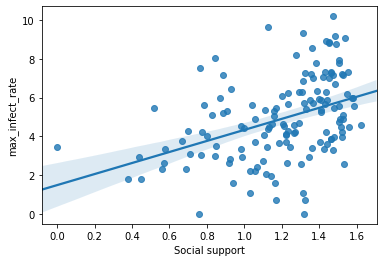

In [54]:
sns.regplot(x,np.log(y))

Plotting Healthy life expectancy vs maximum Infection rate


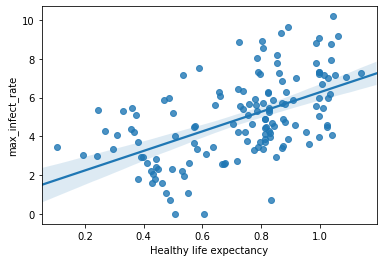

In [57]:
x = data["Healthy life expectancy"]
y = data["max_infect_rate"]
sns.regplot(x,np.log(y))

Plotting Freedom to make life choices vs maximum Infection rate


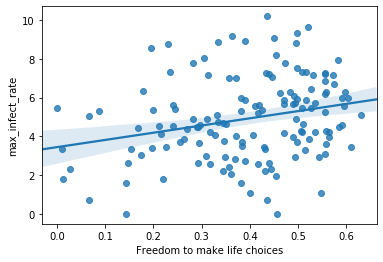

In [58]:
x = data["Freedom to make life choices"]
y = data["max_infect_rate"]
sns.regplot(x,np.log(y))